In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_colwidth', 255)

import requests
from bs4 import BeautifulSoup

In [ ]:
##import requests

# URL = "https://transcripts.foreverdreaming.org/viewforum.php?f=428&sid=17de7fb524a103399b9e50b28381b13b"
# page = requests.get(URL)

# ##print(page.text)
# soup = BeautifulSoup(page.content, "html.parser")

In [ ]:
# import requests

# URL = "https://subslikescript.com/series/Bobs_Burgers-1561755"
# page = requests.get(URL)

# print(page.text)

In [ ]:
url = "https://transcripts.foreverdreaming.org/viewforum.php?f=428"
resp = requests.get(url)
soup = BeautifulSoup(resp.content)

In [ ]:
# print(soup.prettify())

In [ ]:
# table = soup.find_all('div', class_="list-inner")

In [ ]:
table2 = soup.find_all('a', class_="topictitle")

In [ ]:
# print(table2)
for ele in table2:
    print(ele, end="\n"*2)

In [ ]:
for a in table2:
    print(a["href"])

## Get all pages and pull links and titles 

In [4]:
page_1 = 'https://transcripts.foreverdreaming.org/viewforum.php?f=428'
page_2 = 'https://transcripts.foreverdreaming.org/viewforum.php?f=428&start=78'
page_3 = 'https://transcripts.foreverdreaming.org/viewforum.php?f=428&start=156'
page_4 = 'https://transcripts.foreverdreaming.org/viewforum.php?f=428&start=234'

url_list = [page_1, page_2, page_3, page_4]

In [5]:
all_links = []
for url in url_list:
    resp = requests.get(url)
    soup = BeautifulSoup(resp.content)
    table3 = soup.find_all('a', class_="topictitle")
    for a in table3[1:]:         # skip first row - has "update" 
        txt = a.text             # get text with season, episode, and title
        lnk = a["href"]          # get end of link for page with transcript
        all_links.append([lnk,txt])    #add text and url to list

In [6]:
# convert list to dataframe
df = pd.DataFrame(all_links, columns = ['link', 'title_full'])

In [7]:
# extract season, episode and title from column 'title_full'
df['season'] = df['title_full'].astype(str).str[:2]
df['episode'] = df['title_full'].astype(str).str[3:5]
df['title'] = df['title_full'].astype(str).str[8:]

In [8]:
# use regex to remove link extension, saves everything to the left of the '&'
import re
df['link']= [re.sub(r"[&](\S*)",'', str(x)) for x in df['link']]
df['link'] = df['link'].astype(str).str[1:]

In [9]:
start = 'https://transcripts.foreverdreaming.org'
df['link'] = start + df['link'].astype(str)

In [10]:
df = df.drop(columns = 'title_full')

In [11]:
df.head()

,link,season,episode,title
0,https://transcripts.foreverdreaming.org/viewtopic.php?t=112615,13,22,Amelia
1,https://transcripts.foreverdreaming.org/viewtopic.php?t=111610,13,21,Mother Author Laser Pointer
2,https://transcripts.foreverdreaming.org/viewtopic.php?t=109302,13,20,Radio No You Didn't
3,https://transcripts.foreverdreaming.org/viewtopic.php?t=108424,13,19,Crab-solutely Fabulous
4,https://transcripts.foreverdreaming.org/viewtopic.php?t=107941,13,18,Gift Car or Buy Trying


In [12]:
# df.to_csv('BobsBurger_links.csv', index= False)

### Now that data is clean, use 'link' column to pull scripts

In [74]:
#  test on small scale
url = "https://transcripts.foreverdreaming.org/viewtopic.php?t=112615"
resp = requests.get(url)
soup = BeautifulSoup(resp.content)
print(soup.prettify())

<!DOCTYPE html>
<html dir="ltr" lang="en-gb">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <!-- Chrome, Firefox OS and Opera -->
  <meta content="#107c10" name="theme-color"/>
  <!-- Windows Phone -->
  <meta content="#107c10" name="msapplication-navbutton-color"/>
  <!-- iOS Safari -->
  <meta content="#107c10" name="apple-mobile-web-app-status-bar-style"/>
  <title>
   13x22 - Amelia - Transcripts - Forever Dreaming
  </title>
  <link href="/app.php/feed?sid=59cc6f13daadf082178ffc181e15e771" rel="alternate" title="Feed - Transcripts - Forever Dreaming" type="application/atom+xml"/>
  <link href="https://transcripts.foreverdreaming.org/viewtopic.php?t=112615" rel="canonical"/>
  <!--
	phpBB style name: Project Durango
	Based on style:   prosilver (this is the default phpBB3 style)
	Original author:  Tom Beddard ( http://www.subBlue.com/ )
	Modified by:	MannixMD @Mann

In [75]:
table = soup.find_all('div', class_="content")
table

[<div class="content">LOUISE: Hi, everyone.<br/>
 Uh, thank you for coming.  <br/>
 <br/>
 I mean, you had to.<br/>
 (CHUCKLES) It's school.  <br/>
 <br/>
 So, uh, here's my project.  <br/>
 <br/>
 This is a plane. But don't<br/>
 think of it as a plane.  <br/>
 <br/>
 Think of it as a superpower.  <br/>
 <br/>
 'Cause in     , if you were brave enough  <br/>
 <br/>
 to fly one of these things,  <br/>
 <br/>
 to even go up in one, you<br/>
 were kind of a superhero.  <br/>
 <br/>
 WAYNE: That's true for pretty<br/>
 much all new technology.   <br/>
 <br/>
 - It was the same with cars.<br/>
 - Oh, no talking.   <br/>
 <br/>
 Thank you, Wayne. (SIGHS)   <br/>
 <br/>
 Okay, now you've thrown the timing off.   <br/>
 <br/>
 Resetting. Tina? Gene?   <br/>
 <br/>
 TINA: Whoops. Dropped the cloud.   <br/>
 <br/>
 LOUISE: (CHUCKLES NERVOUSLY) Um...   <br/>
 <br/>
 how was everyone's Mother's Day?   <br/>
 <br/>
 Did you all spend it<br/>
 working on your presentations   <br/>
 <br/>
 like I di

In [68]:
df = pd.read_csv('BobsBurger_links.csv')

In [69]:
# create an empty 
df['script'] = None

In [71]:
# get scripts!
for index, link in enumerate(df.link):   # use links in df to get script text
    resp = requests.get(link)
    soup = BeautifulSoup(resp.content)
    table4 = soup.find_all('div', class_="content")
    for div in table4:
        txt = div.text           #return just the text 
        df.script[index] = txt   #add text to empty script column in df, index to add text to correct row

In [73]:
df.to_csv('BobsBurger_scripts.csv', index= False)

### Clean/preprocess script text and prepare it for NLP

In [91]:
df = pd.read_csv('BobsBurger_scripts.csv')

In [92]:
import nltk
from nltk.tokenize import word_tokenize

In [105]:
# LOTS OF CLEANING TO SCRIPT

# list comprehension to remove line breaks from script text
df.script = [re.sub('\n', ' ', txt) for txt in df.script]
# remove apostrophe and don't add space
df.script = [re.sub("'", '', txt) for txt in df.script]
# remove rest of punctuation and replace with space
df.script = [re.sub("[^a-zA-Z#]", ' ', txt) for txt in df.script]
# remove words that are all uppercase (includes charater names - like LOISE or RUDY- and directions - like SNIFFING or CHUCKLES)
#  this also removes the word "I" - is it needed??
df.script = [re.sub(r'\b[A-Z]+\b', '', txt) for txt in df.script]
# change all words to lowercase
df.script = df.script.str.lower()
# tokenize words
df.tokenized = [word_tokenize(df.script[index]) for index,txt in enumerate(df.script)]

In [108]:
# consider removing stopwords later? or setting specific ones?
# from nltk.corpus import stopwords
# stop_words = set(stopwords.words("english"))

In [113]:
# lemmatization next
from nltk.stem import WordNetLemmatizer

# Download wordnet lexicon database
# nltk.download('wordnet')
# nltk.download('omw-1.4')

# Instanciate Lemmatizer
lemmatizer = WordNetLemmatizer()

In [137]:
# this works, but just removes a bunch of trailing "s" -- even on words like was, don't not get to root word
# lemmatized_words = [lemmatizer.lemmatize(word) for word in df.tokenized[0]]
# lemmatized_words

In [127]:
# same as above, only removes trailing 's'
# w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
# lemmatizer = nltk.stem.WordNetLemmatizer()

# def lemmatize_text(text):
#     return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

# df['cleaned'] = df.script.apply(lemmatize_text)
# df.cleaned[0]

## Group and rank!
*Collocation* is a sequence of words that shows up often
https://www.nltk.org/howto/collocations.html

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   link       260 non-null    object
 1   season     260 non-null    int64 
 2   episode    260 non-null    int64 
 3   title      260 non-null    object
 4   script     260 non-null    object
 5   tokenized  260 non-null    object
 6   cleaned    260 non-null    object
dtypes: int64(2), object(5)
memory usage: 14.3+ KB


In [141]:
new_text = nltk.Text(df.tokenized[0])

In [142]:
new_text.collocations()

mothers day; amelia earhart; super spy; eighth grade; puppet kid;
amelia earharts; happy mothers; four days; medford massachusetts;
publicity stunt; son named; sounds like; thats true; biography
section; neil armstrong; werent supposed; ive got; model planes;
shadow puppets; legitimate pilot


In [149]:
# frequency distribution
from nltk import FreqDist

meaningful_words = [word for word in df.tokenized[1] if word.casefold() not in stop_words]
frequency_distribution = FreqDist(meaningful_words)
frequency_distribution.most_common(20)

[('im', 47),
 ('uh', 43),
 ('oh', 39),
 ('snail', 32),
 ('newt', 31),
 ('bea', 29),
 ('dont', 28),
 ('go', 28),
 ('get', 26),
 ('okay', 25),
 ('know', 25),
 ('yeah', 23),
 ('like', 22),
 ('right', 20),
 ('truck', 20),
 ('cat', 20),
 ('youre', 19),
 ('tow', 18),
 ('maybe', 18),
 ('well', 16)]

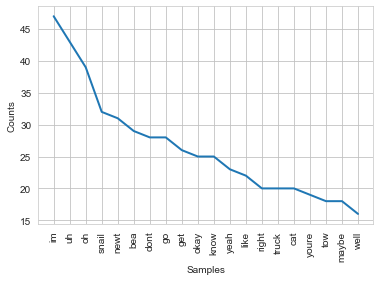

In [150]:
frequency_distribution.plot(20);

#### Fun with a WordCloud

In [151]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

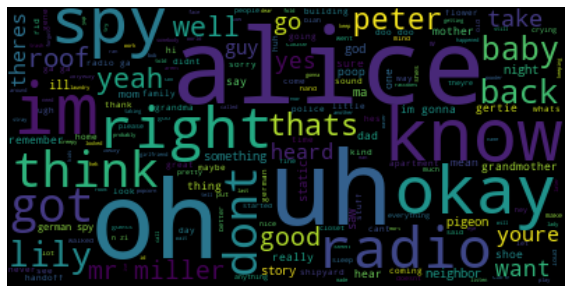

In [159]:
text = df.script[2]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.figure(figsize= (10,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

- https://stackoverflow.com/questions/2452982/how-to-extract-common-significant-phrases-from-a-series-of-text-entries

- https://www.markhneedham.com/blog/2015/01/19/pythonnltk-finding-the-most-common-phrases-in-how-i-met-your-mother/

- https://tazkianida.medium.com/natural-language-processing-find-the-most-common-phrases-on-twitter-1bd17f1941cf

- https://towardsdatascience.com/most-common-text-processing-tasks-in-natural-language-processing-d8cd7a076b79

- https://dev.to/mattschwartz/quickly-find-common-phrases-in-a-large-list-of-strings-9in


Performing Natural Language Processing (NLP) on common phrases involves several steps to preprocess and analyze the text data. Here's a general outline of the process:

Data Collection and Preprocessing:

Gather a dataset containing the common phrases you want to analyze.
Preprocess the text by removing punctuation, special characters, and converting the text to lowercase.
Tokenize the text into individual words or subword units.
Text Vectorization:

Convert the tokenized text into numerical representations that machine learning algorithms can understand.
Common techniques include:
Bag of Words (BoW): Create a matrix representing the frequency of words in each phrase.
TF-IDF (Term Frequency-Inverse Document Frequency): Assign weights to words based on their importance in the phrase and across the dataset.
Word Embeddings: Use pre-trained word embeddings like Word2Vec, GloVe, or fastText to capture semantic relationships between words.
Feature Engineering:

Extract relevant features from the text data that might be useful for your analysis.
This could include features like word count, average word length, presence of certain keywords, etc.
Analysis and Visualization:

Explore the data by visualizing word frequency distributions, generating word clouds, or plotting histograms.
Identify the most common words and phrases in the dataset.
Text Classification or Sentiment Analysis (Optional):

If your goal is to classify phrases into categories or determine sentiment, you can train a machine learning model for classification.
Prepare labeled data where each phrase is associated with a category or sentiment label.
Train a classification model such as Naive Bayes, SVM, or a neural network.
Topic Modeling (Optional):

If you want to discover underlying topics in the common phrases, you can perform topic modeling.
Techniques like Latent Dirichlet Allocation (LDA) can help identify topics that are prevalent in the dataset.
Named Entity Recognition (NER) (Optional):

If your phrases contain named entities (e.g., names of people, places, organizations), you can perform NER to identify and classify them.
Text Generation (Optional):

If you want to generate new text based on the common phrases, you can use techniques like Recurrent Neural Networks (RNNs) or Transformers.
Train a language model on your dataset and use it to generate coherent text.
Evaluation (Optional):

If you built a classification model, evaluate its performance using metrics like accuracy, precision, recall, and F1-score.
If you performed topic modeling, assess the quality of the identified topics based on their coherence and relevance.
Interpretation and Insights:

Analyze the results of your NLP analysis to gain insights into the common phrases.
Identify patterns, trends, and meaningful relationships between words.

# Notes:

In [ ]:
# l = []
# for a in table2:
#     ##td = a.find_all('href')
#     row = [a["href"]]
#     l.append(row)
# links = pd.DataFrame(l, columns= ['link'])

# l2 = []
# for a in table2:
#     row2 = a.text
#     l2.append(row2)
# titles = pd.DataFrame(l2, columns= ['title_episode'])

# df = pd.DataFrame(np.column_stack([links, titles]), columns=['link', 'title_full'])